<a href="https://colab.research.google.com/github/cuican1432/nlu-naluhodo/blob/master/test_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !rm -r /content/nlu-naluhodo

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import time
%matplotlib inline
import pickle
from tqdm import tqdm_notebook as tqdm

Load github repo of this project [github](https://github.com/cuican1432/nlu-naluhodo)

In [1]:
!git clone https://github.com/cuican1432/nlu-naluhodo.git

Cloning into 'nlu-naluhodo'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 130 (delta 68), reused 89 (delta 34), pack-reused 0
Receiving objects: 100% (130/130), 9.76 MiB | 19.87 MiB/s, done.
Resolving deltas: 100% (68/68), done.


Load pre-trained embedding online and unzip

In [2]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
  
zip_ref = zipfile.ZipFile("glove.6B.zip", 'r')
zip_ref.extractall('glove.6B')
zip_ref.close()

--2019-04-27 00:22:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-04-27 00:22:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  1.92MB/s    in 5m 7s   

2019-04-27 00:27:41 (2.67 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [5]:
cd nlu-naluhodo

/content/nlu-naluhodo


In [0]:
from emb.load_embeddings import DataEmbeddings
from models.BiLSTM import BiLstm
from models.LSTM import Lstm
from eval.evaluation import pred_classes_dt, pred_classes_f1, plot_roc_curve, \
  plot_confusion_matrix

Load upsample indices, upsamples the orginal datasets from `1.7k` to `30k` training data by bootstrapping and random split as training, validation, test using k-fold validation methodology ``(3-fold)`` in this case.

In [7]:
data_index = pickle.load(open('data/data_upsample_index.p', 'rb'))

for key in data_index:
    print(key)

train
val
test


Load original full dataset `beeap_1.csv`

In [8]:
beeap_1 = pd.read_csv('data/beeapfinal/beeap_1.csv')
beeap_1.drop('Unnamed: 0', axis=1, inplace=True)
for i in beeap_1.columns[1:]:
    beeap_1[i] = beeap_1[i].astype(np.float64, errors='ignore')
    
print(beeap_1.shape)

(1702, 26)


Test preformance on BiLstm

In [15]:
predictions = []
for i in range(3):
    dataset = DataEmbeddings(data_index, nth_sample= i)
    X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer = dataset.load_data_embeddings(beeap_1, \
                                                                                                       '../glove.6B/glove.6B.300d.txt')
    bilstm = BiLstm()
    bilstm.arguments['epochs'] = 2
    bilstm.fit(X_train, y_train, X_valid, y_valid, embedding_layer)
    bilstm.predict(X_test, batch_size = bilstm.arguments['batch_size'], verbose = 1)
    predictions += [pred]

0it [00:00, ?it/s]

Creating data sample 1 out of 3...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


400000it [00:28, 14167.87it/s]


Found 400000 word vectors.
Loading email contents...
max sequence length: 36540
min sequence length: 58
median sequence length: 303
Found 26969 unique tokens.
Shape of data tensor: (34040, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.
Building BiLstm Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 100, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_model.hdf5', 'early_stop_patience': 10}
Train on 34040 samples, validate on 227 samples
Epoch 1/2
34040/34040 [==============================] - 24s 715us/step - loss: 0.2077 - acc: 0.9189 - val_loss: 0.3058 - val_acc: 0.8987

 ROC-AUC - epoch: 1 - score: 0.863614

Epoch 00001: val_loss improved from inf to 0.30582, saving model to best_model.hdf5
Epoch 2/2
34040/34040 [==============================] - 23s 688us/step - loss: 0.0410 - acc: 0.9881 - val_loss: 0.4238 - va

0it [00:00, ?it/s]

Creating data sample 2 out of 3...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


400000it [00:28, 14160.92it/s]


Found 400000 word vectors.
Loading email contents...
max sequence length: 36540
min sequence length: 58
median sequence length: 296
Found 25931 unique tokens.
Shape of data tensor: (34040, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.
Building BiLstm Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 100, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_model.hdf5', 'early_stop_patience': 10}
Train on 34040 samples, validate on 227 samples
Epoch 1/2
34040/34040 [==============================] - 25s 749us/step - loss: 0.2083 - acc: 0.9174 - val_loss: 0.2970 - val_acc: 0.8928

 ROC-AUC - epoch: 1 - score: 0.845059

Epoch 00001: val_loss improved from inf to 0.29698, saving model to best_model.hdf5
Epoch 2/2
34040/34040 [==============================] - 24s 701us/step - loss: 0.0400 - acc: 0.9882 - val_loss: 0.4201 - va

0it [00:00, ?it/s]

Creating data sample 3 out of 3...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


400000it [00:27, 14400.19it/s]


Found 400000 word vectors.
Loading email contents...
max sequence length: 33773
min sequence length: 58
median sequence length: 298
Found 26054 unique tokens.
Shape of data tensor: (34040, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.
Building BiLstm Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 100, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_model.hdf5', 'early_stop_patience': 10}
Train on 34040 samples, validate on 227 samples
Epoch 1/2
34040/34040 [==============================] - 26s 760us/step - loss: 0.2078 - acc: 0.9177 - val_loss: 0.3380 - val_acc: 0.8759

 ROC-AUC - epoch: 1 - score: 0.871665

Epoch 00001: val_loss improved from inf to 0.33800, saving model to best_model.hdf5
Epoch 2/2
34040/34040 [==============================] - 24s 699us/step - loss: 0.0419 - acc: 0.9873 - val_loss: 0.4667 - va

In [16]:
train_pred = bilstm.predict(X_train, batch_size = 1024, verbose = 1)

y_pred_dt = pred_classes_dt(train_pred, y_train, np.average(predictions, axis=0))
print('macro F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_dt, average='macro')))
print('micro F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_dt, average='micro')))


y_pred_f1 = pred_classes_f1(train_pred, y_train, np.average(predictions, axis=0))
print('macro F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_f1, average='macro')))
print('micro F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_f1, average='micro')))

34040/34040 [==============================] - 6s 169us/step
macro F1 score: 0.4693
micro F1 score: 0.6648
macro F1 score: 0.4693
micro F1 score: 0.6648


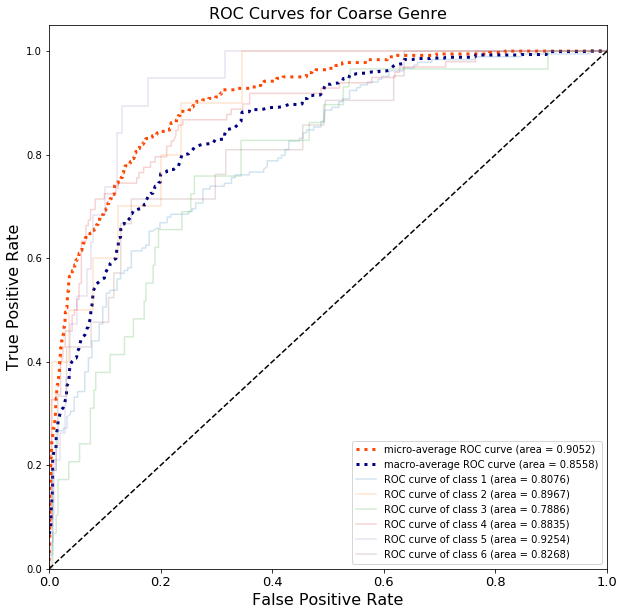

In [17]:
plot_roc_curve(y_test, np.average(predictions, axis=0), y_train,title='ROC Curves for Coarse Genre', micro=True, per_class=True)

Test preformance on Lstm

In [20]:
predictions = []
for i in range(3):
    dataset = DataEmbeddings(data_index, nth_sample= i)
    X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer = dataset.load_data_embeddings(beeap_1, \
                                                                                                       '../glove.6B/glove.6B.300d.txt')
    lstm = Lstm()
    lstm.arguments['epochs'] = 2
    lstm.fit(X_train, y_train, X_valid, y_valid, embedding_layer)
    lstm.predict(X_test, batch_size = bilstm.arguments['batch_size'], verbose = 1)
    predictions += [pred]

1577it [00:00, 15763.18it/s]

Creating data sample 1 out of 3...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


400000it [00:27, 14583.69it/s]


Found 400000 word vectors.
Loading email contents...
max sequence length: 36540
min sequence length: 58
median sequence length: 303
Found 26969 unique tokens.
Shape of data tensor: (34040, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.
Building Lstm Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 50, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_model.hdf5', 'early_stop_patience': 3}
Train on 34040 samples, validate on 227 samples
Epoch 1/2
34040/34040 [==============================] - 8s 242us/step - loss: 0.2988 - acc: 0.8783 - val_loss: 0.2836 - val_acc: 0.8921

 ROC-AUC - epoch: 1 - score: 0.837278

Epoch 00001: val_loss improved from inf to 0.28362, saving model to best_model.hdf5
Epoch 2/2
34040/34040 [==============================] - 6s 175us/step - loss: 0.1138 - acc: 0.9581 - val_loss: 0.3805 - val_acc:

1588it [00:00, 15872.56it/s]

Creating data sample 2 out of 3...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


400000it [00:27, 14638.78it/s]


Found 400000 word vectors.
Loading email contents...
max sequence length: 36540
min sequence length: 58
median sequence length: 296
Found 25931 unique tokens.
Shape of data tensor: (34040, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.
Building Lstm Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 50, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_model.hdf5', 'early_stop_patience': 3}
Train on 34040 samples, validate on 227 samples
Epoch 1/2
34040/34040 [==============================] - 8s 249us/step - loss: 0.2722 - acc: 0.8901 - val_loss: 0.3096 - val_acc: 0.9031

 ROC-AUC - epoch: 1 - score: 0.792696

Epoch 00001: val_loss improved from inf to 0.30963, saving model to best_model.hdf5
Epoch 2/2
34040/34040 [==============================] - 6s 178us/step - loss: 0.1047 - acc: 0.9615 - val_loss: 0.3632 - val_acc:

1584it [00:00, 15826.92it/s]

Creating data sample 3 out of 3...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


400000it [00:27, 14355.20it/s]


Found 400000 word vectors.
Loading email contents...
max sequence length: 33773
min sequence length: 58
median sequence length: 298
Found 26054 unique tokens.
Shape of data tensor: (34040, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.
Building Lstm Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 50, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_model.hdf5', 'early_stop_patience': 3}
Train on 34040 samples, validate on 227 samples
Epoch 1/2
34040/34040 [==============================] - 9s 255us/step - loss: 0.3182 - acc: 0.8715 - val_loss: 0.3036 - val_acc: 0.8693

 ROC-AUC - epoch: 1 - score: 0.814964

Epoch 00001: val_loss improved from inf to 0.30365, saving model to best_model.hdf5
Epoch 2/2
34040/34040 [==============================] - 6s 175us/step - loss: 0.1301 - acc: 0.9504 - val_loss: 0.4015 - val_acc:

In [21]:
train_pred = lstm.predict(X_train, batch_size = 1024, verbose = 1)

y_pred_dt = pred_classes_dt(train_pred, y_train, np.average(predictions, axis=0))
print('macro F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_dt, average='macro')))
print('micro F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_dt, average='micro')))


y_pred_f1 = pred_classes_f1(train_pred, y_train, np.average(predictions, axis=0))
print('macro F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_f1, average='macro')))
print('micro F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_f1, average='micro')))

34040/34040 [==============================] - 1s 44us/step
macro F1 score: 0.4696
micro F1 score: 0.6166
macro F1 score: 0.4629
micro F1 score: 0.6177


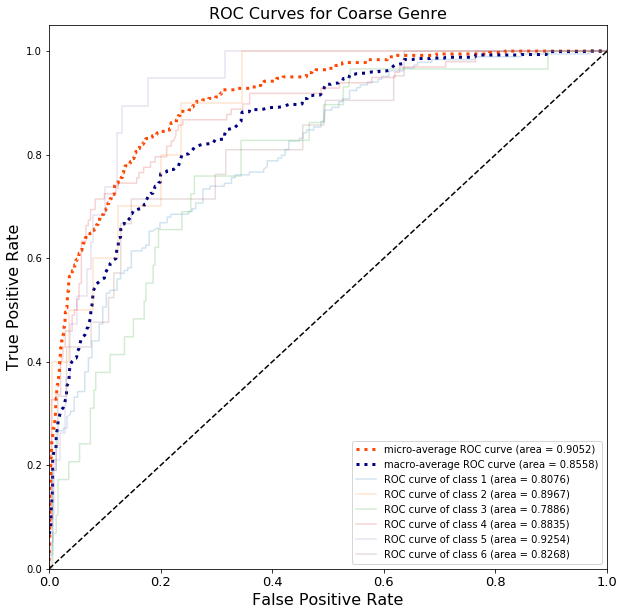

In [22]:
plot_roc_curve(y_test, np.average(predictions, axis=0), y_train,title='ROC Curves for Coarse Genre', micro=True, per_class=True)